In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import pearsonr,spearmanr,pointbiserialr

import seaborn as sns
import matplotlib.pyplot as plt
import mantel

# Import data

In [3]:
FAVEE_model=pd.read_csv('../output_data/group/dimension/within_scores_var.csv',index_col=0)
FAVEE_model.columns = ['Formality','Activeness','Valence','Exchange','Equality']
FAVEE_model['Exchange'] = -FAVEE_model['Exchange']
FAVEE_model['Equality'] = -FAVEE_model['Equality']
FAVEE_model_rdm= pd.DataFrame(euclidean_distances(FAVEE_model),index=FAVEE_model.index,columns=FAVEE_model.index)


FAVEE_FV_model = FAVEE_model[['Formality','Valence']]
FAVEE_FV_model_rdm= pd.DataFrame(euclidean_distances(FAVEE_FV_model),index=FAVEE_FV_model.index,columns=FAVEE_FV_model.index)

In [4]:
FV_model=pd.read_csv('../output_data/group/dimension/within_scores_var_2c.csv',index_col=0)
FV_model.columns = ['Formality','Valence']
FV_model_rdm= pd.DataFrame(euclidean_distances(FV_model),index=FV_model.index,columns=FV_model.index)

In [5]:
HPP_model_rdm=pd.read_csv('../output_data/group/category/cluster_results/rdm_imp_14p.csv',index_col=0) 
HPP_model_rdm=HPP_model_rdm.loc[FV_model.index,FV_model.index]

In [6]:
Six_clusters_rdm=pd.read_csv('../output_data/group/category/cluster_results/rdm_exp_14p.csv',index_col=0)
Six_clusters_rdm=Six_clusters_rdm.loc[FV_model.index,FV_model.index]

# Heatmap

Text(0.5, 1.0, 'Six_clusters')

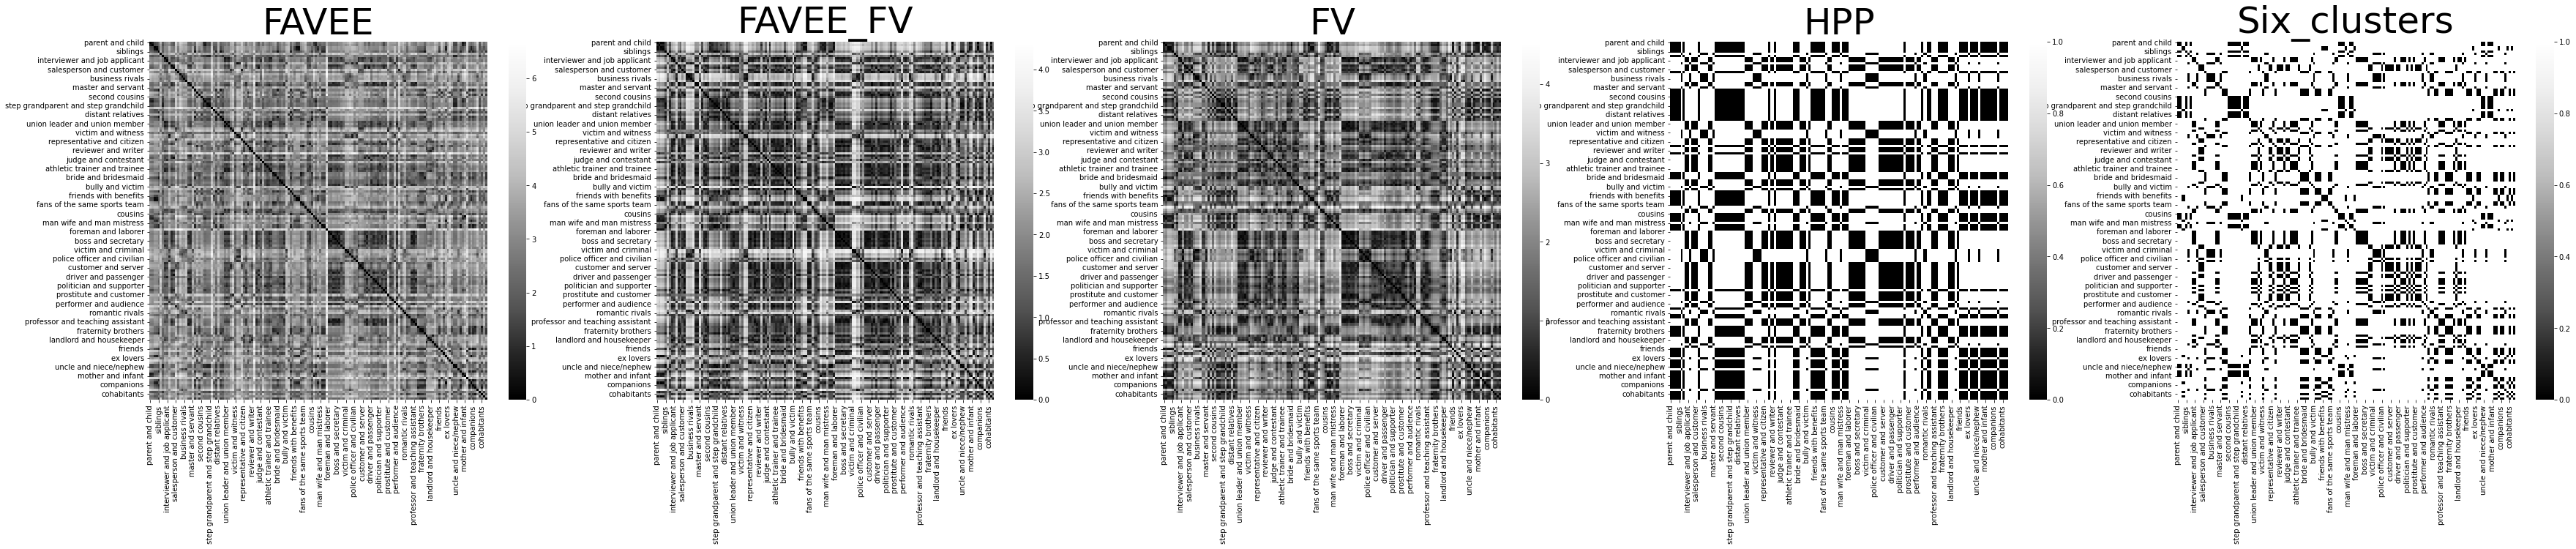

In [29]:
fig, axes = plt.subplots(figsize=(60,9),nrows=1, ncols=5)
sns.heatmap(FAVEE_model_rdm,ax=axes[0],cmap = 'Greys_r')
axes[0].set_title('FAVEE',size=50)
sns.heatmap(FAVEE_FV_model_rdm,ax=axes[1],cmap = 'Greys_r')
axes[1].set_title('FAVEE_FV',size=50)
sns.heatmap(FV_model_rdm,ax=axes[2],cmap = 'Greys_r')
axes[2].set_title('FV',size=50)
sns.heatmap(HPP_model_rdm,ax=axes[3],cmap = 'Greys_r')
axes[3].set_title('HPP',size=50)
sns.heatmap(Six_clusters_rdm,ax=axes[4],cmap = 'Greys_r')
axes[4].set_title('Six_clusters',size=50)

# Correlation & Permutation test

In [12]:
def rdmtoarray(rdm):
    rdm_array = np.array(rdm)[np.triu_indices(159,k=1)]
    return rdm_array

In [13]:
FAVEE_model_array = rdmtoarray(FAVEE_model_rdm)
FAVEE_FV_model_array = rdmtoarray(FAVEE_FV_model_rdm)
FV_model_array = rdmtoarray(FV_model_rdm)
HPP_model_array = rdmtoarray(HPP_model_rdm)
Six_clusters_array = rdmtoarray(Six_clusters_rdm)

## HPP

In [73]:
# def corr(rdm1,rdm2,method):
#     rdm1_array = np.array(rdm1)[np.triu_indices(159,k=1)]
#     rdm2_array = np.array(rdm2)[np.triu_indices(159,k=1)]
    
#     if method == 'pearson':
#         values = pearsonr(rdm1_array,rdm2_array)
    
#     if method == 'spearman':
#         values = spearmanr(rdm1_array,rdm2_array)
        
#     if method == 'pointbiserial':
#         values = pointbiserialr(rdm1_array,rdm2_array)
    
#     return values

In [72]:
print('FAVEE ~ HPP')
print('pearson:{}'.format(mantel.test(FAVEE_model_array, HPP_model_array, 
                                      perms=10000, method='pearson', tail='two-tail')))
print('spearman:{}'.format(mantel.test(FAVEE_model_array, HPP_model_array, 
                                      perms=10000, method='spearman', tail='two-tail')))
print('######################################################################')

print('FV(filtered from FAVEE) ~ HPP')
print('pearson:{}'.format(mantel.test(FAVEE_FV_model_array, HPP_model_array, 
                                      perms=10000, method='pearson', tail='two-tail')))
print('spearman:{}'.format(mantel.test(FAVEE_FV_model_array, HPP_model_array, 
                                      perms=10000, method='spearman', tail='two-tail')))
print('######################################################################')

print('FV(derived from 2 dimensions using PCA ) ~ HPP')
print('pearson:{}'.format(mantel.test(FV_model_array, HPP_model_array, 
                                      perms=10000, method='pearson', tail='two-tail')))
print('spearman:{}'.format(mantel.test(FV_model_array, HPP_model_array, 
                                      perms=10000, method='spearman', tail='two-tail')))

FAVEE ~ HPP
pearson:MantelResult(0.4365195263997705, 0.0001, 25.841454437211304)
spearman:MantelResult(0.43252206928638504, 0.0001, 25.89811360420019)
######################################################################
FV(filtered from FAVEE) ~ HPP
pearson:MantelResult(0.4743215712943368, 0.0001, 28.29331752894521)
spearman:MantelResult(0.477751276735207, 0.0001, 29.67521488779775)
######################################################################
FV(derived from 2 dimensions using PCA ) ~ HPP
pearson:MantelResult(0.5384359022421751, 0.0001, 37.609598838429925)
spearman:MantelResult(0.5455096044490018, 0.0001, 38.829306945779685)


## Six clusters

In [74]:
print('FAVEE ~ Six clusters')
print('pearson:{}'.format(mantel.test(FAVEE_model_array, Six_clusters_array, 
                                      perms=10000, method='pearson', tail='two-tail')))
print('spearman:{}'.format(mantel.test(FAVEE_model_array, Six_clusters_array, 
                                      perms=10000, method='spearman', tail='two-tail')))
print('######################################################################')

print('FV(filtered from FAVEE) ~ Six clusters')
print('pearson:{}'.format(mantel.test(FAVEE_FV_model_array, Six_clusters_array, 
                                      perms=10000, method='pearson', tail='two-tail')))
print('spearman:{}'.format(mantel.test(FAVEE_FV_model_array, Six_clusters_array, 
                                      perms=10000, method='spearman', tail='two-tail')))
print('######################################################################')

print('FV(derived from 2 dimensions using PCA ) ~ Six clusters')
print('pearson:{}'.format(mantel.test(FV_model_array, Six_clusters_array, 
                                      perms=10000, method='pearson', tail='two-tail')))
print('spearman:{}'.format(mantel.test(FV_model_array, Six_clusters_array, 
                                      perms=10000, method='spearman', tail='two-tail')))

FAVEE ~ Six clusters
pearson:MantelResult(0.3926880791300791, 0.0001, 33.181383735970634)
spearman:MantelResult(0.37286907851515577, 0.0001, 32.052072083723544)
######################################################################
FV(filtered from FAVEE) ~ Six clusters
pearson:MantelResult(0.37260492197898065, 0.0001, 31.982140816318974)
spearman:MantelResult(0.37971461299588116, 0.0001, 32.7281960840451)
######################################################################
FV(derived from 2 dimensions using PCA ) ~ Six clusters
pearson:MantelResult(0.3662330714561576, 0.0001, 34.21937030428472)
spearman:MantelResult(0.36898948249181396, 0.0001, 34.701328113272496)
